In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Categories=['total_normal','total_pneumonia']

In [5]:
flat_data_arr=[]
target_arr=[]

In [6]:
datadir = 'D:/github/combined_dataset/dataset'

In [7]:
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : total_normal
loaded category:total_normal successfully
loading... category : total_pneumonia
loaded category:total_pneumonia successfully


In [8]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

In [9]:
df=pd.DataFrame(flat_data)
df['Target']=target

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#param_grid={'kernel':['rbf']}
model=svm.SVC(probability=True, kernel="rbf")
#model=GridSearchCV(svc,param_grid)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [13]:
model.fit(x_train,y_train)

SVC(probability=True)

In [14]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 94.97016197783461% accurate


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

      NORMAL       0.92      0.89      0.91       319
   PNEUMONIA       0.96      0.97      0.97       854

    accuracy                           0.95      1173
   macro avg       0.94      0.93      0.94      1173
weighted avg       0.95      0.95      0.95      1173



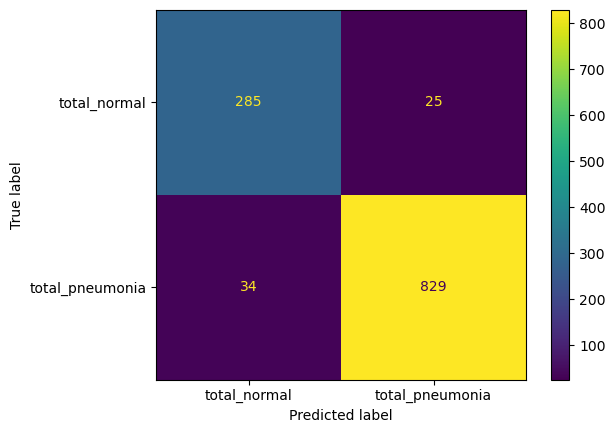

In [22]:
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Categories)
disp.plot()

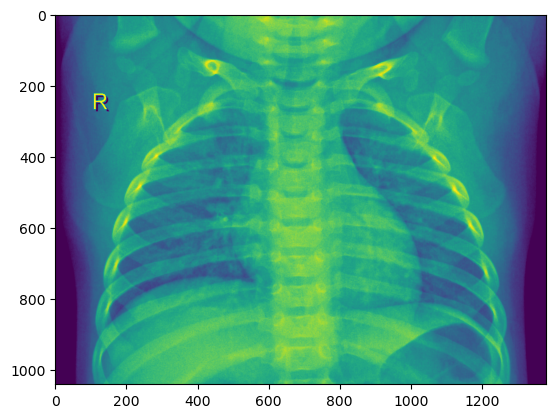

total_normal = 98.78640296180143%
total_pneumonia = 1.2135970381985512%
The predicted image is : total_normal


In [24]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

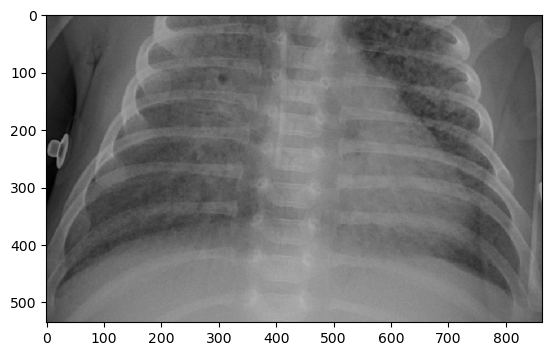

total_normal = 1.4644830363891121%
total_pneumonia = 98.53551696361089%
The predicted image is : total_pneumonia


In [25]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])